<a href="https://colab.research.google.com/github/RicBarbosa/Jogo-DA-Velha_OpenGL/blob/main/MiniCursoDataScience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Uma (muito breve) introdução à Python

![Python logo, disponível em: https://www.python.org/static/community_logos/python-logo-master-v3-TM-flattened.png](https://www.python.org/static/community_logos/python-logo-master-v3-TM-flattened.png)

Python é a linguagem "queridinha" dos Cientistas de Dados devido a seu catálogo vasto de bibliotecas de manipulação de dados, matemática e frameworks que abstraem muitos detalhes de programação. Além disso, a integração com as bibliotecas é extremamente simples, e sua sintaxe é simples e fácil de aprender. 


## Variáveis
Python é uma linguagem **fortemente tipada**, ou seja, faz uso dos tipos convencionais (int, float, char, etc.), porém ela é também **dinamicamente tipada**, o que significa que você não precisa declarar o tipo de uma variável. Vamos ver alguns exemplos.

In [ ]:
nome = "Goku"
altura = 1.85
filhos = ['Gohan', 'Goten']

print(f'Oi eu sou {nome}. Tenho {altura} e meus filhos sao: {filhos}')
print(f'Nome {type(nome)}, Altura {type(altura)}, Filhos {type(filhos)}')

Oi eu sou Goku. Tenho 1.85 e meus filhos sao: ['Gohan', 'Goten']
Nome <class 'str'>, Altura <class 'float'>, Filhos <class 'list'>


## Dicionários
Python fornece uma estrutura de dados muito útil para cientistas de dados (e programadores no geral) chamada de Dicionário. Você pode enchergar ela como um `Hash Map`, onde temos pares *chave-valor*. O grande diferencial é que esses pares podem ser de tipos diferentes.

In [ ]:
meu_dict = {
    'nome':'Goku',
    'altura': 1.85,
    'filhos': ['Gohan', 'Goten']
}

print(meu_dict)

{'nome': 'Goku', 'altura': 1.85, 'filhos': ['Gohan', 'Goten']}


## Condicionais, loops e escopo
Códigos em Python não utilizam chaves para identificação de escopo. a identificação é feita a partir da **identação** do código. Para ilustrar, vamos fazer um código que detecta valores pares ou ímpares em uma lista:

In [ ]:
nums = [1,2,3,4,5,6,7,8,9,10]

for num in nums:
  if num % 2 == 0:
    print(f"{num} eh par")
  else:
    print(f'{num} eh impar')

1 eh impar
2 eh par
3 eh impar
4 eh par
5 eh impar
6 eh par
7 eh impar
8 eh par
9 eh impar
10 eh par


## Funções e compreensão de lista

Python trabalha com funções da mesma forma que outras linguagens. Você declara suas funções e as utiliza onde for necessário, passando os parâmetros corretos. 
Python ainda fornece uma facilidade para a manipulação de listas, chamada **compreensão de listas**. Nisso, você pode converter um `for` explícito em apenas uma linha de código. Vamos ver um exemplo de compreensão de listas com

In [ ]:
def par_ou_impar(num):
  if num % 2 == 0:
    return f"{num} eh par"
  else:
    return f'{num} eh impar'

resultado = [ par_ou_impar(num) for num in nums]
print(resultado)

def eh_par(num):
  if num % 2 == 0:
    return True
  return False

pares = [num for num in nums if eh_par(num)]
print(pares)


['1 eh impar', '2 eh par', '3 eh impar', '4 eh par', '5 eh impar', '6 eh par', '7 eh impar', '8 eh par', '9 eh impar', '10 eh par']
[2, 4, 6, 8, 10]


# Analisando e transformando dados com Spark

Iremos usar a biblioteca de Ciência de Dados Distribuída chamada PySpark (versão Python do Spark). O Spark possui diversas funcionalidades implementadas para manipulação de dados e execução de *pipelines* de Aprendizado de Máquina em **Sistemas Distribuídos**. Um Sistema Distribuído é um que engloba vários computadores interconectados operando como uma única unidade. Sistemas assim são necessários para projetos de Big Data, pois o volume de dados excede a capacidade de uma única máquina processar. 

Computação distribuída foge do escopo deste Notebook, portanto iremos abstrair o conceito. A razão de trabalharmos com Spark é que esta é uma biblioteca extremamente simples e didática para ensinar as principais operações de ciência de dados. Spark é construído em Scala, porém fornece aplicações em diversas linguagens. Uma delas é Python, chamada PySpark. Spark fornece uma série de módulos:

![Pilha de APIs, disponível em: https://www.oreilly.com/library/view/spark-the-definitive/9781491912201/](https://izhangzhihao.github.io/assets/images/spark-05.png)

Na aula de hoje veremos um pouco sobre `Dataframes` e `SparkSQL`, pois operam "em conjunto".

**Dataframes** são estruturas tabulares, assim como os DataFrames de Pandas. A diferença, aqui, é que Dataframes em Spark são _distribuídos_ e construídos em cima de RDDs (a unidade básica e de mais baixo nível onde as demais APIs de Spark são construídas). 

**SparkSQL** é um conjunto de funcionalidades que são operadas em Dataframes. Veremos que podemos manipular Dataframes tanto programaticamente quanto por linguagem SQL. Além disso, SparkSQL oferece uma série de outras ferramentas para a realização de operações tabulares distribuídas.


## Instalando e importando PySpark

Para instalá-la, basta fazer o download  e seguir os passos em: http://spark.apache.org/downloads.html, ou instalar usando Pypi:

	pip install pyspark

Para utilizá-la em conjunto com um Jupyter Notebook, você precisa baixar a biblioteca Jupyter.

	pip install jupyter
    
Depois, baixar também a biblioteca findspark

	pip install findspark

E pronto! Agora, no começo de cada notebook você deverá importar tanto `findspark` quanto `pyspark`:

In [ ]:
! pip install pyspark
! pip install findspark

import findspark
findspark.init()

import pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.3 MB 40 kB/s 
     |████████████████████████████████| 199 kB 47.9 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.0-py2.py3-none-any.whl size=281764026 sha256=2ca33bce9b42737d3154cb385a311f375e9365808923e3be6182cb7ac08e20af
  Stored in directory: /root/.cache/pip/wheels/7a/8e/1b/f73a52650d2e5f337708d9f6a1750d451a7349a867f928b885
Successfully built pyspark
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## O objeto SparkSession

Para manipularmos Dataframes e utilizar as funções do SparkSQL, porém, precisamos criar um objeto `SparkSession`. O `SparkSession` é um objeto que serve como ponto de entrada para as APIs estruturadas do Spark. 

![SparkSession, disponível em: https://www.dcc.fc.up.pt/~edrdo/aulas/bdcc/classes/spark_arch/images/python_and_spark.png](https://www.dcc.fc.up.pt/~edrdo/aulas/bdcc/classes/spark_arch/images/python_and_spark.png)

Para inicializar um SparkSession, importamos sua definição de `pyspark.sql` e criamos um objeto com `SparkSession.builder.getOrCreate()`. Esse método checa se já existe um `SparkSession` ativo, e se não existir, cria um novo.

In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()
print(spark)

## Criando Dataframes

Dataframes são objetos tabulares distribuídos. Você pode criar um dataframe lendo arquivos csv, JSON, [ORC](https://orc.apache.org/) e [Parquet](https://github.com/apache/parquet-format). Vamos começar fazendo um exemplo de leitura simplificada de um arquivo csv. Vamos ler um conjunto de dados sobre vôos realizados nos Estados Unidos no ano de 2014.

In [ ]:
flights_df = spark.read.csv('flights.csv', header=True)
flights_df.show(10)


+----+-----+---+--------+---------+--------+---------+-------+-------+------+------+----+--------+--------+----+------+
|year|month|day|dep_time|dep_delay|arr_time|arr_delay|carrier|tailnum|flight|origin|dest|air_time|distance|hour|minute|
+----+-----+---+--------+---------+--------+---------+-------+-------+------+------+----+--------+--------+----+------+
|2014|   12|  8|     658|       -7|     935|       -5|     VX| N846VA|  1780|   SEA| LAX|     132|     954|   6|    58|
|2014|    1| 22|    1040|        5|    1505|        5|     AS| N559AS|   851|   SEA| HNL|     360|    2677|  10|    40|
|2014|    3|  9|    1443|       -2|    1652|        2|     VX| N847VA|   755|   SEA| SFO|     111|     679|  14|    43|
|2014|    4|  9|    1705|       45|    1839|       34|     WN| N360SW|   344|   PDX| SJC|      83|     569|  17|     5|
|2014|    3|  9|     754|       -1|    1015|        1|     AS| N612AS|   522|   SEA| BUR|     127|     937|   7|    54|
|2014|    1| 15|    1037|        7|    1

## Schemas

O Spark pode fazer múltiplas leituras de um arquivo CSV para automaticamente tentar **inferir** qual é o _Schema_ do Dataframe, ou seja, qual é a tipagem de cada coluna e se ela pode ter ou não valores _null_. 

In [ ]:
flights_df.printSchema()

flights_df = spark.read.csv('flights.csv', header=True, inferSchema=True)
flights_df.printSchema()

root
 |-- year: string (nullable = true)
 |-- month: string (nullable = true)
 |-- day: string (nullable = true)
 |-- dep_time: string (nullable = true)
 |-- dep_delay: string (nullable = true)
 |-- arr_time: string (nullable = true)
 |-- arr_delay: string (nullable = true)
 |-- carrier: string (nullable = true)
 |-- tailnum: string (nullable = true)
 |-- flight: string (nullable = true)
 |-- origin: string (nullable = true)
 |-- dest: string (nullable = true)
 |-- air_time: string (nullable = true)
 |-- distance: string (nullable = true)
 |-- hour: string (nullable = true)
 |-- minute: string (nullable = true)

root
 |-- year: integer (nullable = true)
 |-- month: integer (nullable = true)
 |-- day: integer (nullable = true)
 |-- dep_time: string (nullable = true)
 |-- dep_delay: string (nullable = true)
 |-- arr_time: string (nullable = true)
 |-- arr_delay: string (nullable = true)
 |-- carrier: string (nullable = true)
 |-- tailnum: string (nullable = true)
 |-- flight: integer (nu

## Detectando valores errados

Parece que o Spark não inferiu corretamente o tipo de algumas colunas! Isso pode acontecer se tivermos múltiplos tipos de dados numa única coluna. Quando isso acontece, ele atribui por padrão o tipo `string`. Vamos tentar detectar quais valores estão dando problema.

Para isso, iremos utilizar duas funções de Dataframes do Spark: `select()` e `filter()`. Vamos ver um pouco de cada.

### Select

O comando `select()` opera em nível de **coluna**, filtrando quais colunas você quer exibir. Ele pode ainda criar novas colunas, com métodos que analisam valores de uma ou mais colunas linha a linha. É o equivalente ao comando `SELECT` de uma consulta SQL. 

In [ ]:
flights_df.select(flights_df.tailnum, 'origin', flights_df['dest']).show(5)

flights_df.select('tailnum', 'origin', 'dest', (flights_df.air_time / 60).alias('air_time_hours')).show()

+-------+------+----+
|tailnum|origin|dest|
+-------+------+----+
| N846VA|   SEA| LAX|
| N559AS|   SEA| HNL|
| N847VA|   SEA| SFO|
| N360SW|   PDX| SJC|
| N612AS|   SEA| BUR|
+-------+------+----+
only showing top 5 rows

+-------+------+----+------------------+
|tailnum|origin|dest|    air_time_hours|
+-------+------+----+------------------+
| N846VA|   SEA| LAX|               2.2|
| N559AS|   SEA| HNL|               6.0|
| N847VA|   SEA| SFO|              1.85|
| N360SW|   PDX| SJC|1.3833333333333333|
| N612AS|   SEA| BUR|2.1166666666666667|
| N646SW|   PDX| DEN|2.0166666666666666|
| N422WN|   PDX| OAK|               1.5|
| N361VA|   SEA| SFO|1.6333333333333333|
| N309AS|   SEA| SAN|              2.25|
| N564AS|   SEA| ORD|               3.3|
| N323AS|   SEA| LAX|2.1666666666666665|
| N305AS|   SEA| PHX| 2.566666666666667|
| N433AS|   SEA| LAS|2.1166666666666667|
| N765AS|   SEA| ANC|              3.05|
| N713AS|   SEA| SFO|              2.15|
| N27205|   PDX| SFO|               1.5

### Filter

A função `filter()` opera em nível de **linhas**, e utiliza operações lógicas que retornam resultados _binários_. É similar ao comando `WHERE` de uma consulta SQL.

In [ ]:
flights_df.filter(flights_df.dep_delay < 0).show()

air_hours = (flights_df.air_time / 60).alias('air_time_hours')

flights_df.select('tailnum', 'origin', 'dest', air_hours).filter('air_time_hours < 2').show(3)



+----+-----+---+--------+---------+--------+---------+-------+-------+------+------+----+--------+--------+----+------+
|year|month|day|dep_time|dep_delay|arr_time|arr_delay|carrier|tailnum|flight|origin|dest|air_time|distance|hour|minute|
+----+-----+---+--------+---------+--------+---------+-------+-------+------+------+----+--------+--------+----+------+
|2014|   12|  8|     658|       -7|     935|       -5|     VX| N846VA|  1780|   SEA| LAX|     132|     954|   6|    58|
|2014|    3|  9|    1443|       -2|    1652|        2|     VX| N847VA|   755|   SEA| SFO|     111|     679|  14|    43|
|2014|    3|  9|     754|       -1|    1015|        1|     AS| N612AS|   522|   SEA| BUR|     127|     937|   7|    54|
|2014|    5| 12|    1655|       -5|    1842|      -18|     VX| N361VA|   755|   SEA| SFO|      98|     679|  16|    55|
|2014|    4| 19|    1236|       -4|    1508|       -7|     AS| N309AS|   490|   SEA| SAN|     135|    1050|  12|    36|
|2014|   11| 19|    1812|       -3|    2

### Usando funções customizadas em `filter()`

Para podermos entender o que está errado com os valores que deveriam ser `Integers` em algumas das colunas do nosso `Dataframe`, nós vamos primeiro ter que criar uma função que verifique se os valores de uma coluna são números ou não. O Spark fornece um mecanismo chamado `UDF` (_User-Defined Functions_) para que seus usuários criem funções customizadas. Para tal, precisamos importar o pacote `pyspark.sql.functions`, definir nossas funções e encapsulá-las em um `UDF` usando o seguinte formato:

`F.udf(funcão, tipo_de_retorno)`

Vamos criar uma função que verifica se um valor é inteiro ou não, e aplicar esta função em um filtro para exibir dados que **não** são inteiros.

In [ ]:
import pyspark.sql.functions as F
import pyspark.sql.types as types

def is_not_integer(num):
  num = num.replace('-','')
  return not num.isdigit()

is_not_integer_udf = F.udf(is_not_integer, types.BooleanType())
flights_df.filter(is_not_integer_udf(flights_df.dep_time)).show(10)

+----+-----+---+--------+---------+--------+---------+-------+-------+------+------+----+--------+--------+----+------+
|year|month|day|dep_time|dep_delay|arr_time|arr_delay|carrier|tailnum|flight|origin|dest|air_time|distance|hour|minute|
+----+-----+---+--------+---------+--------+---------+-------+-------+------+------+----+--------+--------+----+------+
|2014|    3|  4|      NA|       NA|      NA|       NA|     UA|     NA|   156|   SEA| DEN|      NA|    1024|  NA|    NA|
|2014|    2| 12|      NA|       NA|      NA|       NA|     AS| N527AS|     2|   SEA| DCA|      NA|    2329|  NA|    NA|
|2014|    7|  1|      NA|       NA|      NA|       NA|     WN| N8323C|  2485|   SEA| MDW|      NA|    1733|  NA|    NA|
|2014|    4| 30|      NA|       NA|      NA|       NA|     AS| N526AS|   566|   PDX| LAX|      NA|     834|  NA|    NA|
|2014|    1|  3|      NA|       NA|      NA|       NA|     US|     NA|   553|   SEA| PHL|      NA|    2378|  NA|    NA|
|2014|    8|  7|      NA|       NA|     

## Removendo valores errôneos

Detectamos que em nosso `Dataframe`, valores nulos (`NaN`s) estão representados pelo String **NA**. Vamos tentar remover todas as linhas que tiverem valores **NA**.

Para facilitar nossa vida, Spark fornece opções para a definição de valores nulos durante a leitura de arquivos. Vamos reler nosso _flights.csv_ definindo como `null` células da nossa tabela que tiverem o String **NA**.

Uma outra opção seria filtrar o Dataframe coluna a coluna para valores `!= NA`, mas isso é um trabalho repetitivo e entediante que pode ser resolvido de uma maneira mais simples.

In [ ]:
flights_df = spark.read.csv('flights.csv', header=True, inferSchema=True, nullValue='NA')
flights_df.printSchema()

flights_df.filter(F.isnull(flights_df.dep_time)).show()
clean_flights_df = flights_df.dropna()
clean_flights_df.filter(F.isnull(clean_flights_df.dep_time)).show()

root
 |-- year: integer (nullable = true)
 |-- month: integer (nullable = true)
 |-- day: integer (nullable = true)
 |-- dep_time: integer (nullable = true)
 |-- dep_delay: integer (nullable = true)
 |-- arr_time: integer (nullable = true)
 |-- arr_delay: integer (nullable = true)
 |-- carrier: string (nullable = true)
 |-- tailnum: string (nullable = true)
 |-- flight: integer (nullable = true)
 |-- origin: string (nullable = true)
 |-- dest: string (nullable = true)
 |-- air_time: integer (nullable = true)
 |-- distance: integer (nullable = true)
 |-- hour: integer (nullable = true)
 |-- minute: integer (nullable = true)

+----+-----+---+--------+---------+--------+---------+-------+-------+------+------+----+--------+--------+----+------+
|year|month|day|dep_time|dep_delay|arr_time|arr_delay|carrier|tailnum|flight|origin|dest|air_time|distance|hour|minute|
+----+-----+---+--------+---------+--------+---------+-------+-------+------+------+----+--------+--------+----+------+
|2014|  

## Juntando tabelas diferentes

A função `join()` une dois Dataframes a partir de uma coluna em comum. Há vários tipos diferentes de joins no Spark:

![Tipos de join. Disponível em: https://medium.com/bild-journal/pyspark-joins-explained-9c4fba124839](https://miro.medium.com/max/622/1*6d7MzkjxS0eBWjOJN5TaAQ.jpeg)

Todos os tipos de join mostrados acima podem ser usados junto com o método. Vamos ver dois exemplos: `'left_outer'` e `'inner'`. 

In [ ]:
airplanes_df = spark.read.csv('airplanes.csv', header=True, inferSchema=True, nullValue='NA')
airplanes_df = airplanes_df.withColumnRenamed('year', 'year_plane')
airplanes_df.show(10)

flights_planes_df = clean_flights_df.join(airplanes_df, on='tailnum', how='inner')
flights_planes_df.show(5)

+-------+----------+--------------------+----------------+--------+-------+-----+-----+---------+
|tailnum|year_plane|                type|    manufacturer|   model|engines|seats|speed|   engine|
+-------+----------+--------------------+----------------+--------+-------+-----+-----+---------+
| N102UW|      1998|Fixed wing multi ...|AIRBUS INDUSTRIE|A320-214|      2|  182| null|Turbo-fan|
| N103US|      1999|Fixed wing multi ...|AIRBUS INDUSTRIE|A320-214|      2|  182| null|Turbo-fan|
| N104UW|      1999|Fixed wing multi ...|AIRBUS INDUSTRIE|A320-214|      2|  182| null|Turbo-fan|
| N105UW|      1999|Fixed wing multi ...|AIRBUS INDUSTRIE|A320-214|      2|  182| null|Turbo-fan|
| N107US|      1999|Fixed wing multi ...|AIRBUS INDUSTRIE|A320-214|      2|  182| null|Turbo-fan|
| N108UW|      1999|Fixed wing multi ...|AIRBUS INDUSTRIE|A320-214|      2|  182| null|Turbo-fan|
| N109UW|      1999|Fixed wing multi ...|AIRBUS INDUSTRIE|A320-214|      2|  182| null|Turbo-fan|
| N110UW|      1999|

## Removendo colunas desnecessárias e linhas duplicadas

Algumas colunas de nosso Dataframe podem, na verdade, influenciar negativamente no treinamento de um modelo preditivo. Algumas informações podem de fato ser removidas. Para tal, iremos utilizar o método `drop()`.

Só para nos precavermos, vamos remover também linhas duplicadas utilizando o método `distinct()`, e remover linhas com valores nulos que podem têr vindo de `airplanes.csv`.

In [ ]:
flights_planes_df.show(5)

rm_columns = ['tailnum','year','day','flight','hour', 'minute', 'year_plane', 'seats', 'speed']
clean_flights_df = flights_planes_df.drop(*rm_columns).distinct().dropna()
clean_flights_df.show(5)

+-------+----+-----+---+--------+---------+--------+---------+-------+------+------+----+--------+--------+----+------+----------+--------------------+------------+--------+-------+-----+-----+---------+
|tailnum|year|month|day|dep_time|dep_delay|arr_time|arr_delay|carrier|flight|origin|dest|air_time|distance|hour|minute|year_plane|                type|manufacturer|   model|engines|seats|speed|   engine|
+-------+----+-----+---+--------+---------+--------+---------+-------+------+------+----+--------+--------+----+------+----------+--------------------+------------+--------+-------+-----+-----+---------+
| N846VA|2014|   12|  8|     658|       -7|     935|       -5|     VX|  1780|   SEA| LAX|     132|     954|   6|    58|      2011|Fixed wing multi ...|      AIRBUS|A320-214|      2|  182| null|Turbo-fan|
| N559AS|2014|    1| 22|    1040|        5|    1505|        5|     AS|   851|   SEA| HNL|     360|    2677|  10|    40|      2006|Fixed wing multi ...|      BOEING| 737-890|      2|  1

## Adicionando e transformando colunas

Vamos fazer mais algumas modificações que irão auxiliar futuramente nosso modelo a prever se um vôo irá atrasar ou não. Algoritmos de aprendizado de máquina não funcionam bem quando dados estão em dimensões diferentes entre colunas. É importante que façamos modificações para que as colunas estejam na mesma dimensão e assim uma não acabe introduzindo viés sobre a outra. 

Iremos trabalhar com normalização dos dados em algumas colunas aqui. Outras, que representam dados **categóricos**, serão manipuladas a seguir. 

### Normalização em _z-score_

Esse tipo de normalização transforma os dados em valores que representam sua variação em relação à média. 

$$ z = \frac{x_i - \mu}{\delta} $$

![Normalização em z-score, disponível em: https://miro.medium.com/max/692/1*er9yh82tMZ85RWOSkKb-xA.png](https://miro.medium.com/max/692/1*er9yh82tMZ85RWOSkKb-xA.png)

Para transformar nossos dados, vamos precisar definir uma `UDF` que realize esse cálculo. Vamos precisar também definir a média e o desvio padrão de nossas colunas. Podemos utilizar o comando `agg()` pra isso. Finalmente, precisamos criar colunas com esses valores transformados utilizando o método `withColumn()`.

In [ ]:
def z_norm(num, mean, stddev):
    return (num - mean)/stddev

z_nomr_udf = F.udf(z_norm, types.DoubleType())

list_columns = ['dep_delay', 'air_time', 'distance', 'engines']

for column in list_columns:
    mean = clean_flights_df.agg({column: 'mean'}).collect()[0][0]
    stddev = clean_flights_df.agg({column: 'stddev'}).collect()[0][0]
    clean_flights_df = clean_flights_df.withColumn(column + "_z", z_nomr_udf(clean_flights_df[column], F.lit(mean), F.lit(stddev)))
    clean_flights_df = clean_flights_df.drop(column)

clean_flights_df.show(10)

+-----+--------+--------+---------+-------+------+----+--------------------+--------------+-----------+----------+--------------------+--------------------+--------------------+--------------------+
|month|dep_time|arr_time|arr_delay|carrier|origin|dest|                type|  manufacturer|      model|    engine|         dep_delay_z|          air_time_z|          distance_z|           engines_z|
+-----+--------+--------+---------+-------+------+----+--------------------+--------------+-----------+----------+--------------------+--------------------+--------------------+--------------------+
|    7|    2224|      48|      -20|     AS|   PDX| ANC|Fixed wing multi ...|        BOEING|  737-990ER| Turbo-fan|-0.24285388522178225|  0.4684714095546512|  0.5421309582166458|0.019581928676691514|
|    8|    1647|    1925|        3|     DL|   SEA| SLC|Fixed wing multi ...|        BOEING|    757-232| Turbo-fan|  0.3257515433389363| -0.9476419959183021| -0.7524887184428243|0.019581928676691514|
|    

### Criando a coluna _alvo_

Vamos aproveitar esse momento e criar a nossa coluna _alvo_. Essa coluna será o que iremos utilizar como objetivo para o algoritmo de aprendizado tentar prever. Essa coluna alvo será uma coluna com valores binários que irá informar se o vôo atrasou ou não.

In [ ]:
def is_late(minutes):
    if minutes <= 0:
        return 0
    return 1

is_late_udf = F.udf(is_late, types.IntegerType())

clean_flights_df = clean_flights_df.withColumn('is_late', is_late_udf(clean_flights_df.arr_delay)).drop('arr_delay')
clean_flights_df.show(10)

+-----+--------+--------+-------+------+----+--------------------+--------------+-----------+----------+--------------------+--------------------+--------------------+--------------------+-------+
|month|dep_time|arr_time|carrier|origin|dest|                type|  manufacturer|      model|    engine|         dep_delay_z|          air_time_z|          distance_z|           engines_z|is_late|
+-----+--------+--------+-------+------+----+--------------------+--------------+-----------+----------+--------------------+--------------------+--------------------+--------------------+-------+
|    7|    2224|      48|     AS|   PDX| ANC|Fixed wing multi ...|        BOEING|  737-990ER| Turbo-fan|-0.24285388522178225|  0.4684714095546512|  0.5421309582166458|0.019581928676691514|      0|
|    8|    1647|    1925|     DL|   SEA| SLC|Fixed wing multi ...|        BOEING|    757-232| Turbo-fan|  0.3257515433389363| -0.9476419959183021| -0.7524887184428243|0.019581928676691514|      1|
|    2|    1243

## Visualizando Dados graficamente

Infelizmente, Spark não suporta visualização de dados nativamente. Para visualizá-los, podemos:
- Utilizar bibliotecas de terceiros, como a `pyspark_dist_explore` (não recomendado, última versão em 2019), ou
- Retirar uma amostra dos dados e transformá-la em `Pandas Dataframes`, e aproveitar as bibliotecas `Matplotlib` ou `Seaborn`

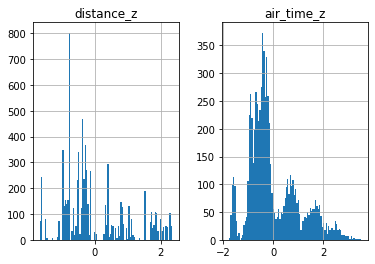

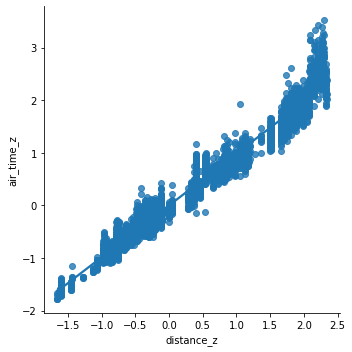

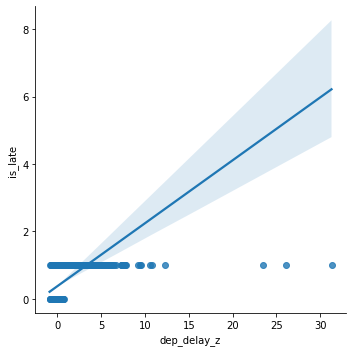

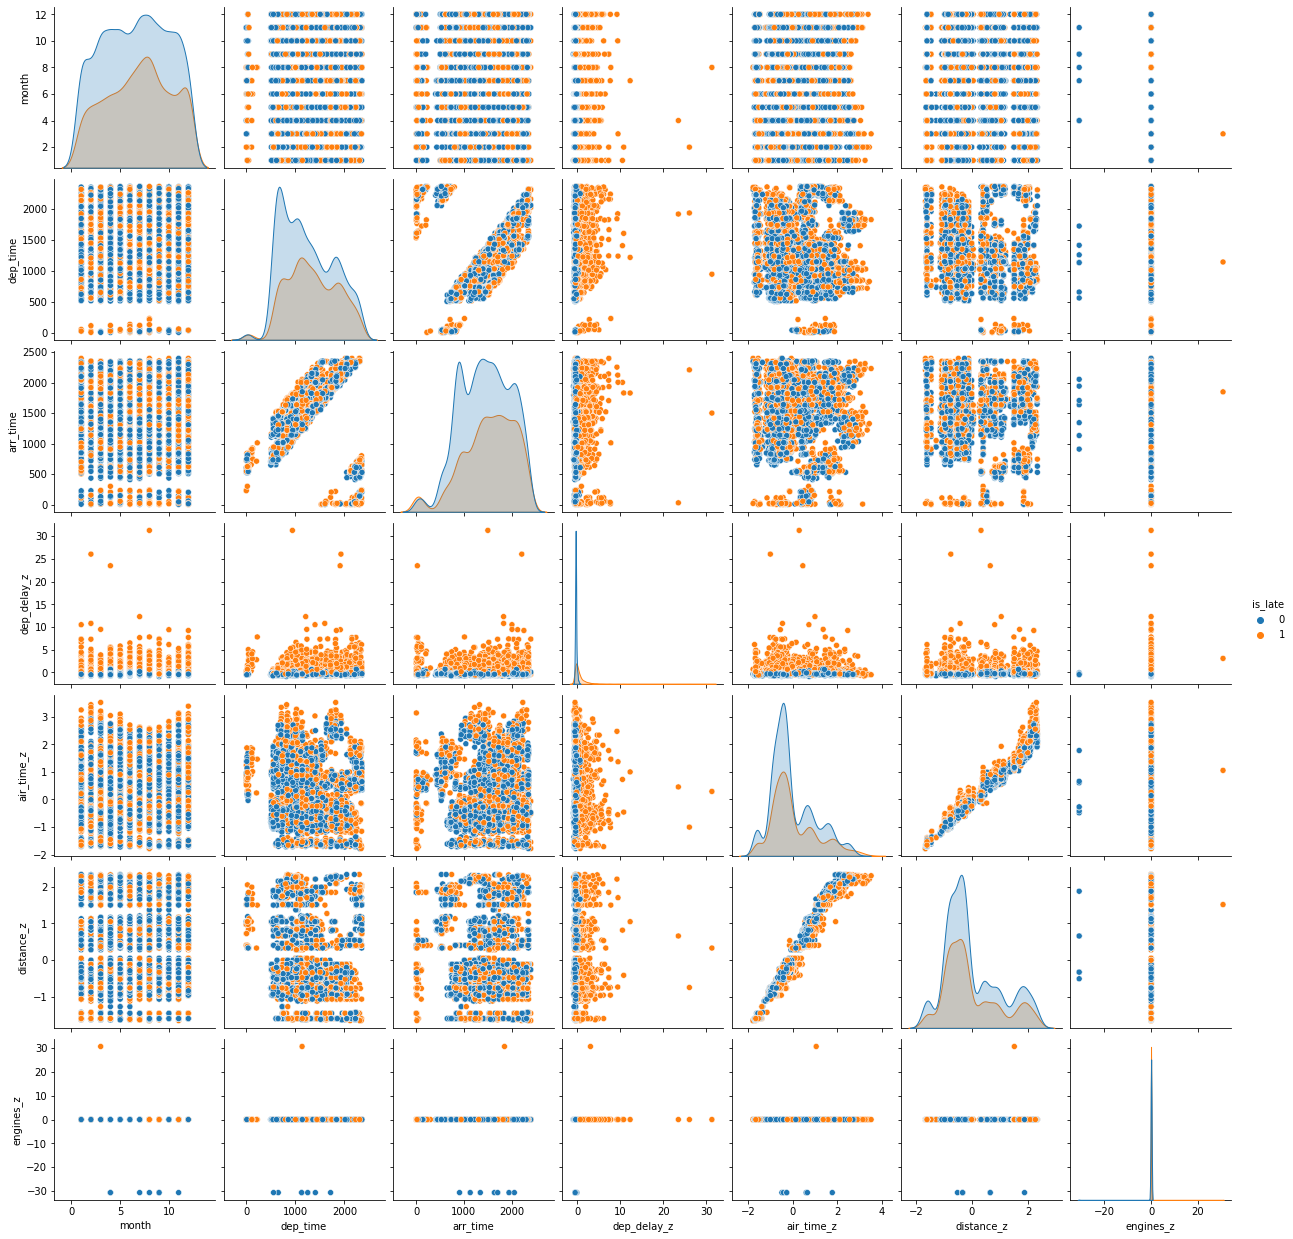

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

flight_sample_df = clean_flights_df.sample(withReplacement=False, fraction=0.8, seed=10)
flight_sample_pd = flight_sample_df.toPandas()

flight_sample_pd.hist(bins=100, column=['distance_z','air_time_z'])
sns.lmplot(x='distance_z', y='air_time_z', data=flight_sample_pd)
sns.lmplot(x='dep_delay_z', y='is_late', data=flight_sample_pd)
sns.pairplot(flight_sample_pd, hue='is_late')
plt.show()

# Aprendizado de Máquina com Spark

Spark oferece um ambiente completo para aprendizado de máquina em sua biblioteca `MLlib`, que implementa diversas tarefas de modo distribuído e escalável. Veremos alguns exemplos de suas funcionalidades, que podem ser divididas em três grandes categorias:
- Transformações de Características
- Algoritmos
- Otimização 

## Transformações de Características

Spark oferece uma grande quantidade de transformações de características que podem ser aplicadas em Dataframes. Essas transformações vão além das funcionalidades vistas antes na biblioteca SQL. 


As transformações de características estão localizadas no módulo `pyspark.ml.feature`. No nosso caso, nós iremos ver quatro transformações necessárias para executarmos nosso algoritmo preditor de atrasos de vôos:
- Indexador de String
- Transformador de valores em _buckets_
- Transformador de representações _One-Hot_
- Criador de vetores

### StringIndexer

O Indexador de String transforma o conteúdo de cada célula de uma coluna de Strings em um valor categórico. Essa decisão é feita com base na frequência do elemento. 

Vamos modificar as colunas String de nossa tabela.

In [ ]:
from pyspark.ml.feature import StringIndexer

cols_to_index = ['carrier','origin','dest','type','manufacturer','model','engine']
cols_output = ['carrier_idx','origin_idx','dest_idx','type_idx','manufacturer_idx','model_idx','engine_idx']

indexer = StringIndexer(inputCols=cols_to_index, outputCols=cols_output)
indexer_model = indexer.fit(clean_flights_df)
flights_si = indexer_model.transform(clean_flights_df)

flights_si.select('origin','origin_idx').distinct().show()
flights_si.select('dest','dest_idx').distinct().show()

flights_si = flights_si.drop(*cols_to_index)
flights_si.show()

+------+----------+
|origin|origin_idx|
+------+----------+
|   PDX|       1.0|
|   SEA|       0.0|
+------+----------+

+----+--------+
|dest|dest_idx|
+----+--------+
| TPA|    58.0|
| SJC|     7.0|
| SAN|    11.0|
| BOS|    23.0|
| FAT|    41.0|
| EWR|    20.0|
| BWI|    47.0|
| HOU|    54.0|
| SEA|    21.0|
| MIA|    66.0|
| RDM|    38.0|
| OGG|    28.0|
| CVG|    65.0|
| ATL|    12.0|
| SMF|     9.0|
| CLT|    33.0|
| MDW|    30.0|
| MCO|    49.0|
| LIH|    46.0|
| DFW|    26.0|
+----+--------+
only showing top 20 rows

+-----+--------+--------+--------------------+--------------------+--------------------+--------------------+-------+-----------+----------+--------+--------+----------------+---------+----------+
|month|dep_time|arr_time|         dep_delay_z|          air_time_z|          distance_z|           engines_z|is_late|carrier_idx|origin_idx|dest_idx|type_idx|manufacturer_idx|model_idx|engine_idx|
+-----+--------+--------+--------------------+--------------------+--------

### Bucketizer

Às vezes é interessante transformar valores contínuos em discretos para uma generalização melhor do modelo. O modelo assim passa a diferenciar por _categorias_ de valores e não tentar entender um comportamento a partir da variação em um valor. Ou ainda, é interessante diminuir o número de categorias presentes em uma variável já discreta.

Essa tarefa é conhecida como _bucketing_ ou _binning_. Vamos fazer essa transformação com as colunas `dep_time` e `arr_time`.

In [ ]:
from pyspark.ml.feature import Bucketizer

splits = [1,300,600,900,1200,1500,1800,2100,2400]
bucket_dep = Bucketizer(splits=splits, inputCol='dep_time',outputCol='dep_time_bucket')
flights_bucket = bucket_dep.transform(flights_si)
bucket_dep = Bucketizer(splits=splits, inputCol='arr_time',outputCol='arr_time_bucket')
flights_bucket = bucket_dep.transform(flights_bucket)
 
flights_bucket.select('dep_time','dep_time_bucket').show(3)
flights_bucket = flights_bucket.drop(*['dep_time','arr_time'])
flights_bucket.show(3)

+--------+---------------+
|dep_time|dep_time_bucket|
+--------+---------------+
|    2224|            7.0|
|    1647|            5.0|
|    1243|            4.0|
+--------+---------------+
only showing top 3 rows

+-----+--------------------+--------------------+-------------------+--------------------+-------+-----------+----------+--------+--------+----------------+---------+----------+---------------+---------------+
|month|         dep_delay_z|          air_time_z|         distance_z|           engines_z|is_late|carrier_idx|origin_idx|dest_idx|type_idx|manufacturer_idx|model_idx|engine_idx|dep_time_bucket|arr_time_bucket|
+-----+--------------------+--------------------+-------------------+--------------------+-------+-----------+----------+--------+--------+----------------+---------+----------+---------------+---------------+
|    7|-0.24285388522178225|  0.4684714095546512| 0.5421309582166458|0.019581928676691514|      0|        0.0|       1.0|     5.0|     0.0|             0.0|

### OneHotEncoder

Dados categóricos não podem ser manipulados pela maioria de algoritmos de aprendizado de máquina, pelo simples fato de que eles não possuem relação matemática alguma entre si. Para podermos usar dados categóricos na maioria dos algoritmos, precisamos transformá-los em uma representação **one-hot**. 

Spark realiza essa conversão através do `OneHotEncoder`, porém o que faz de fato é gerar uma representação **dummy**: 

![Representação one-hot. Retirado de: https://www.kaggle.com/getting-started/187540](https://www.googleapis.com/download/storage/v1/b/kaggle-forum-message-attachments/o/inbox%2F5315434%2Fa9886ea90db74aad0b2f86d2686c337b%2Fohe-vs-dummy.png?generation=1601465979026694&alt=media)

Vamos converter os índices e buckets que criamos em representações one-hot.

In [ ]:
from pyspark.ml.feature import OneHotEncoder

cols_input = ['month','carrier_idx','origin_idx','dest_idx','type_idx','manufacturer_idx','model_idx','engine_idx','dep_time_bucket','arr_time_bucket']
cols_oh_output = ['month_oh','carrier_oh','origin_oh','dest_oh','type_oh','manufacturer_oh','model_oh','engine_oh','dep_time_oh','arr_time_oh']

onehot = OneHotEncoder(inputCols=cols_input, outputCols=cols_oh_output)
flights_oh = onehot.fit(flights_bucket).transform(flights_bucket)
flights_oh.select('month','month_oh').distinct().show()
flights_oh = flights_oh.drop(*cols_input)
flights_oh.show(3)

+-----+---------------+
|month|       month_oh|
+-----+---------------+
|    2| (12,[2],[1.0])|
|   12|     (12,[],[])|
|    8| (12,[8],[1.0])|
|    6| (12,[6],[1.0])|
|    4| (12,[4],[1.0])|
|    7| (12,[7],[1.0])|
|    1| (12,[1],[1.0])|
|    5| (12,[5],[1.0])|
|    3| (12,[3],[1.0])|
|    9| (12,[9],[1.0])|
|   10|(12,[10],[1.0])|
|   11|(12,[11],[1.0])|
+-----+---------------+

+--------------------+--------------------+-------------------+--------------------+-------+--------------+--------------+-------------+--------------+-------------+---------------+---------------+-------------+-------------+-------------+
|         dep_delay_z|          air_time_z|         distance_z|           engines_z|is_late|      month_oh|    carrier_oh|    origin_oh|       dest_oh|      type_oh|manufacturer_oh|       model_oh|    engine_oh|  dep_time_oh|  arr_time_oh|
+--------------------+--------------------+-------------------+--------------------+-------+--------------+--------------+-------------

### VectorAssembler

Spark requer que toda a informação que será passada para um algoritmo de Aprendizado de Máquina seja convertida em um único vetor. Para fazer isso, usaremos `VectorAssembler`.

In [ ]:
from pyspark.ml.feature import VectorAssembler

cols_oh_output = ['dep_delay_z','air_time_z','distance_z','engines_z','month_oh','carrier_oh','origin_oh','dest_oh','type_oh','manufacturer_oh','model_oh','engine_oh','dep_time_oh','arr_time_oh']

vec = VectorAssembler(inputCols=cols_oh_output, outputCol='features')
flights_vec = vec.transform(flights_oh)
flights_vec = flights_vec.drop(*cols_oh_output)
flights_vec.show(truncate=False)



+-------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|is_late|features                                                                                                                                                                       |
+-------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|0      |(202,[0,1,2,3,11,16,32,95,97,110,184,195],[-0.24285388522178225,0.4684714095546512,0.5421309582166458,0.019581928676691514,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0])                   |
|1      |(202,[0,1,2,3,12,19,26,33,95,97,119,184,193,201],[0.3257515433389363,-0.9476419959183021,-0.7524887184428243,0.019581928676691514,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0])    |
|0      |(202,[0,1,2,3,6,18,26,30,95,98,122,184,192,200],[-0.278391724

## Algoritmos de aprendizado de máquina em Spark

Spark possui três grandes categorias de algoritmos de aprendizado de máquina. 
- Classificação e Regressão (Aprendizado Supervisionado)
- Agrupamento (Aprendizado Não-Supervisionado)
- Filtragem Colaborativa (Sistemas de Recomendação)

Para nosso exemplo de preditor de atraso em vôos, iremos considerar a primeira categoria. Iremos utilizar o algoritmo de Regressão Logística, uma das unidades básicas para a criação das famosas Redes Neurais.

### Divindo a base de dados entre treino e teste

Para rodarmos nosso algoritmo de aprendizado, nós precisamos primeiro dividir nossa tabela em um conjunto de `treino` (que será aplicado ao algoritmo para ele gerar um modelo), e um conjunto de `teste` (onde iremos avaliar sua eficácia). Outra possibilidade é realizar uma `validação cruzada` dos dados. 

![Avaliação de algoritmos de ML. Retirado de: https://miro.medium.com/max/720/1*4G__SV580CxFj78o9yUXuQ.png](https://miro.medium.com/max/720/1*4G__SV580CxFj78o9yUXuQ.png)



In [ ]:
flights_train , flights_test = flights_vec.randomSplit([0.8,0.2], seed=123)

### Regressão Logística

O algoritmo de regressão logística tenta estimar um modelo que trace uma curva em formato de S nos nossos dados, utilizando uma função chamada sigmoide para realizar classificação binária:  

![Disponível em: https://www.javatpoint.com/logistic-regression-in-machine-learning](https://static.javatpoint.com/tutorial/machine-learning/images/logistic-regression-in-machine-learning.png)



In [ ]:
from pyspark.ml import feature
from pyspark.ml.classification import LogisticRegression

log_reg = LogisticRegression(featuresCol='features', labelCol='is_late')
preds_flights = log_reg.fit(flights_train).transform(flights_test)
preds_flights.groupBy('is_late','prediction').count().show()

+-------+----------+-----+
|is_late|prediction|count|
+-------+----------+-----+
|      1|       0.0|  165|
|      0|       0.0| 1078|
|      1|       1.0|  556|
|      0|       1.0|  101|
+-------+----------+-----+



### Avaliando o modelo

Para avaliar a performance dos algoritmos, podemos utilizar dois objetos:`MulticlassClassificationEvaluator` e `BinaryClassificationEvaluator`. O primeiro lida com avaliação de modelos capazes discretizar entre múltiplas classes e contém métricas como `precisão` e `revocação`, entre outras. Já o segundo, foca em análise de classificação binária e possui implementações específicas para esse caso, como `AUC` (área abaixo da curva ROC). 

Precisão e Revocação:

![Disponível em: https://miro.medium.com/max/878/1*Ub0nZTXYT8MxLzrz0P7jPA.png](https://miro.medium.com/max/878/1*Ub0nZTXYT8MxLzrz0P7jPA.png)


Área abaixo da curva ROC (AUC):

![Disponível em: https://glassboxmedicine.files.wordpress.com/2019/02/roc-curve-v2.png](https://glassboxmedicine.files.wordpress.com/2019/02/roc-curve-v2.png)


In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator, BinaryClassificationEvaluator

multi_eval = MulticlassClassificationEvaluator().setLabelCol('is_late')
prec_flights = multi_eval.evaluate(preds_flights, {multi_eval.metricName: 'weightedPrecision'})
recall_flights = multi_eval.evaluate(preds_flights, {multi_eval.metricName: 'weightedRecall'})

bin_eval = BinaryClassificationEvaluator().setLabelCol('is_late')
AUC_flights = bin_eval.evaluate(preds_flights,{bin_eval.metricName:'areaUnderROC'})

print(f'Precision: {prec_flights}')
print(f'Recall: {recall_flights}')
print(f'AUC: {AUC_flights}')

Precision: 0.8592931129699222
Recall: 0.8600000000000001
AUC: 0.9254992888728933


# O que vem a seguir?

Vimos que nosso sistema está relativamente bom, pelas métricas analizadas, com quase 86% de precisão, e com uma AUC de 92.5% (ou seja, detectou muito mais instâncias corretas do que erradas, a medida que ambas taxas sobem). Porém, o trabalho de um cientista de dados não para por aí: ele deve investigar se consegue melhorar ainda mais essas taxas. Para tal, ele pode tentar algumas coisas a mais:

- **Explorar ainda mais os dados:** combinar características, excluir características desnecessárias ou adicionar características de outras fontes de dados (por exemplo, informação sobre os aeroportos em si).
- **Tentar outros parâmetros manualmente:** nós usamos aqui os valores padrões dos parâmetros da Regressão Logística. Podemos manipulá-los e verificar se há uma melhora no modelo. 
- **Realizar validação cruzada e exploração de parâmetros em grade:** utilizar da validação cruzada para reduzir viés ao explorar múltiplas combinações de conjuntos de treino, teste e validação. Aplicar exploração em grade dentro desse cenário para analizar todas as possíveis combinações de valores de parâmetros e escolher a opção mais relevante.
- **Utilizar outros algoritmos:** verificar como o sistema se comporta aplicando outros algoritmos, como árvores de decisão, algoritmos de vizinhança ou redes neurais.